In [1]:
from nbconfig import configure_path
configure_path()

In [2]:
import numpy as np
from sklearn.metrics import classification_report
from src.models.hypernnclassifier import HyperNNClassifier
from src.utils import plot_boxes
import src.torchsetup as tsetup

In [3]:
SEED = 5
tsetup.set_seeds(SEED)
DEVICE = tsetup.set_device(cuda=False)

In [4]:
X = np.array([[1,1], [3,3], [4,4], [10,10]])
y = np.array([1, 0, 1, 0])

In [5]:
X = (X - np.mean(X)) / np.std(X)

In [6]:
clf = HyperNNClassifier(
    nboxes=2,
    dim=X.shape[1],
    training_epochs=3000,
    learning_rate=0.01,
    l2_reg=0.0001,
    patience_early_stopping=100,
    tau=0.5,
    alpha=0.5,
    alpha_tau_decay_step=10,
    verbosity=500,
    verbose=True,
    device=DEVICE,
    random_state=SEED)

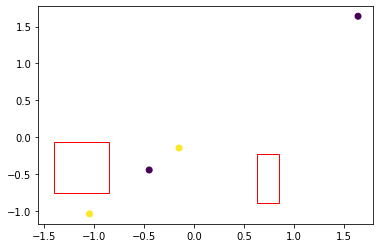

In [7]:
plot_boxes(clf.model, X, y)

In [8]:
clf.fit(X, y)

Epoch:  500
Loss:  0.014792111702263355
Epoch:  1000
Loss:  0.0031199846416711807
Epoch:  1500
Loss:  0.0027158046141266823
Epoch:  2000
Loss:  0.002496874425560236
Epoch:  2500
Loss:  0.0022181919775903225
Epoch:  3000
Loss:  0.0018703797832131386


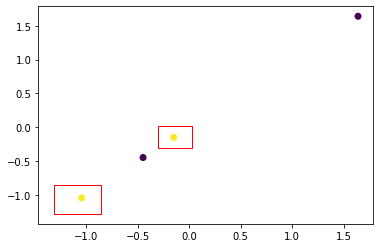

In [9]:
plot_boxes(clf.model, X, y)

In [10]:
y_pred = clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [11]:
clf.model.block.mins

Parameter containing:
tensor([[-1.3150, -1.2805],
        [-0.3006, -0.3021]], requires_grad=True)

In [12]:
clf.model.block.length

Parameter containing:
tensor([[-0.4552,  0.4209],
        [-0.3266, -0.3262]], requires_grad=True)